Introduction
============

<div class="materials-no-ipynb">

Materials and setup
-------------------

### Lab computer users: Log in using the user name and password on the board to your left.<span class="tag" data-tag-name="labsetup"></span>

### Laptop users: You should have R installed --if not:

#### Open a web browser and go to <http://cran.r-project.org> and download and install it

#### Also helpful to install RStudio (download from <http://rstudio.com>)

#### In R, type `install.packages("ggplot2")` to install the ggplot2 package.

### Everyone: Download workshop materials:

#### Download materials from <http://tutorials.iq.harvard.edu/R/Rgraphics.zip>

#### Extract the zip file containing the materials to your desktop

Workshop notes are available in .hmtl format. Open a file browser, navigate to your desktop and open Rgraphics.html

Workshop Overview
-----------------

Class Structure and Organization:

-   Ask questions at any time. Really!
-   Collaboration is encouraged
-   This is your class! Special requests are encouraged

</div>

This is an intermediate R course:

-   Assumes working knowledge of R
-   Relatively fast-paced
-   Focus is on `ggplot2` graphics--other packages will not be covered

Starting A The End
------------------

My goal: by the end of the workshop you will be able to reproduce this graphic from the Economist:

![](images/Economist1.png)

Why `ggplot2`?
--------------

Advantages of ggplot2

-   consistent underlying `grammar of graphics` (Wilkinson, 2005)
-   plot specification at a high level of abstraction
-   very flexible
-   theme system for polishing plot appearance
-   mature and complete graphics system
-   many users, active mailing list

That said, there are some things you cannot (or should not) do With ggplot2:

-   3-dimensional graphics (see the rgl package)
-   Graph-theory type graphs (nodes/edges layout; see the igraph package)
-   Interactive graphics (see the ggvis package)

What Is The Grammar Of Graphics?
--------------------------------

The basic idea: independently specify plot building blocks and combine them to create just about any kind of graphical display you want. Building blocks of a graph include:

-   data
-   aesthetic mapping
-   geometric object
-   statistical transformations
-   scales
-   coordinate system
-   position adjustments
-   faceting

The structure of a `ggplot`
---------------------------

The `ggplot()` function is used to initialize the basic graph structure, then we add to it. The structure of a ggplot looks like this:

In [1]:
  ggplot(data = <default data set>, 
         aes(x = <default x axis variable>,
             y = <default y axis variable>,
             ... <other default aesthetic mappings>),
         ... <other plot defaults>) +

         geom_<geom type>(aes(size = <size variable for this geom>, 
                        ... <other aesthetic mappings>),
                    data = <data for this point geom>,
                    stat = <statistic string or function>,
                    position = <position string or function>,
                    color = <"fixed color specification">,
                    <other arguments, possibly passed to the _stat_ function) +

    scale_<aesthetic>_<type>(name = <"scale label">,
                       breaks = <where to put tick marks>,
                       labels = <labels for tick marks>,
                       ... <other options for the scale>) +

    theme(plot.background = element_rect(fill = "gray"),
          ... <other theme elements>)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:17: unexpected '<'
1:   ggplot(data = <
                    ^


Don't be afraid, you will understand this by the end of the workshop! The basic idea is that you specify different parts of the plot, and add them together using the `+` operator.

Example Data: `Housing prices`
------------------------------

Let's look at housing prices.

In [3]:
  housing <- read.csv("dataSets/landdata-states.csv")
  head(housing[1:5])

State region Date    Home.Value Structure.Cost
1 AK    West   2010.25 224952     160599        
2 AK    West   2010.50 225511     160252        
3 AK    West   2009.75 225820     163791        
4 AK    West   2010.00 224994     161787        
5 AK    West   2008.00 234590     155400        
6 AK    West   2008.25 233714     157458

(Data from <https://www.lincolninst.edu/subcenters/land-values/land-prices-by-state.asp>)

`ggplot2` VS Base Graphics
--------------------------

Compared to base graphics, `ggplot2`

-   is more verbose for simple / canned graphics
-   is less verbose for complex / custom graphics
-   does not have methods (data should always be in a `data.frame`)
-   uses a different system for adding plot elements

`ggplot2` VS Base for simple graphs
-----------------------------------

Base graphics histogram example:

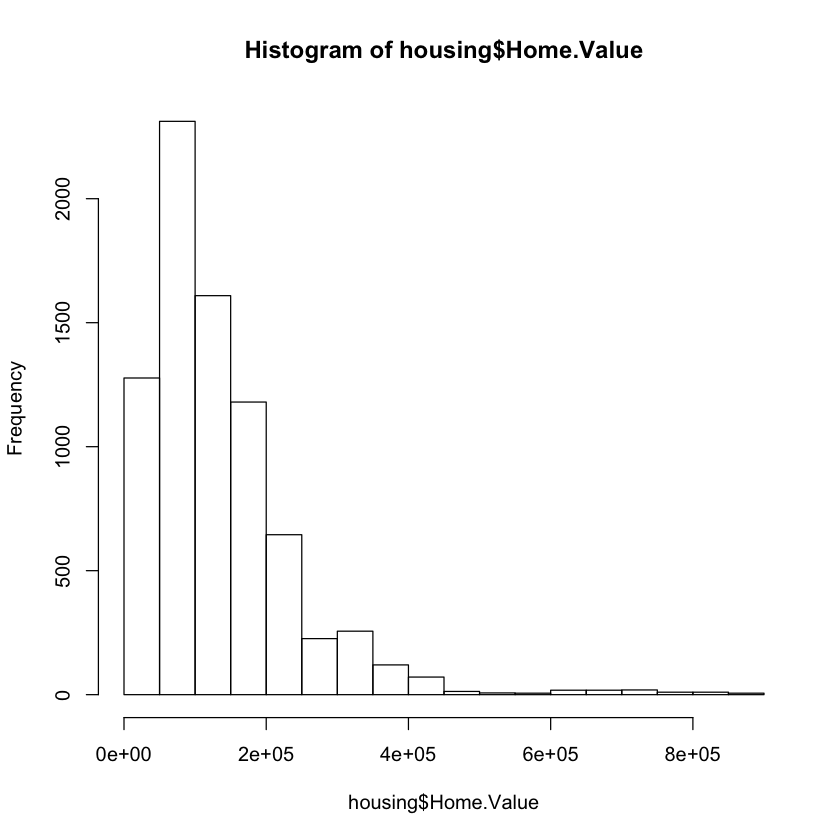

In [4]:
  hist(housing$Home.Value)

`ggplot2` histogram example:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


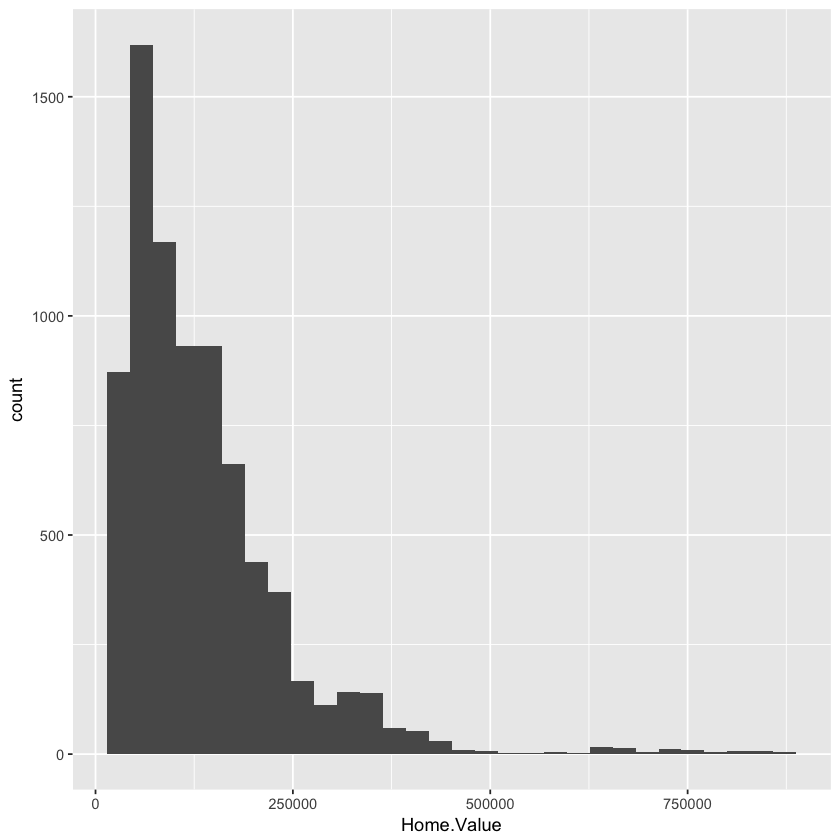

In [5]:
  library(ggplot2)
  ggplot(housing, aes(x = Home.Value)) +
    geom_histogram()

Base wins!

`ggplot2` Base graphics VS `ggplot` for more complex graphs:
------------------------------------------------------------

Base colored scatter plot example:

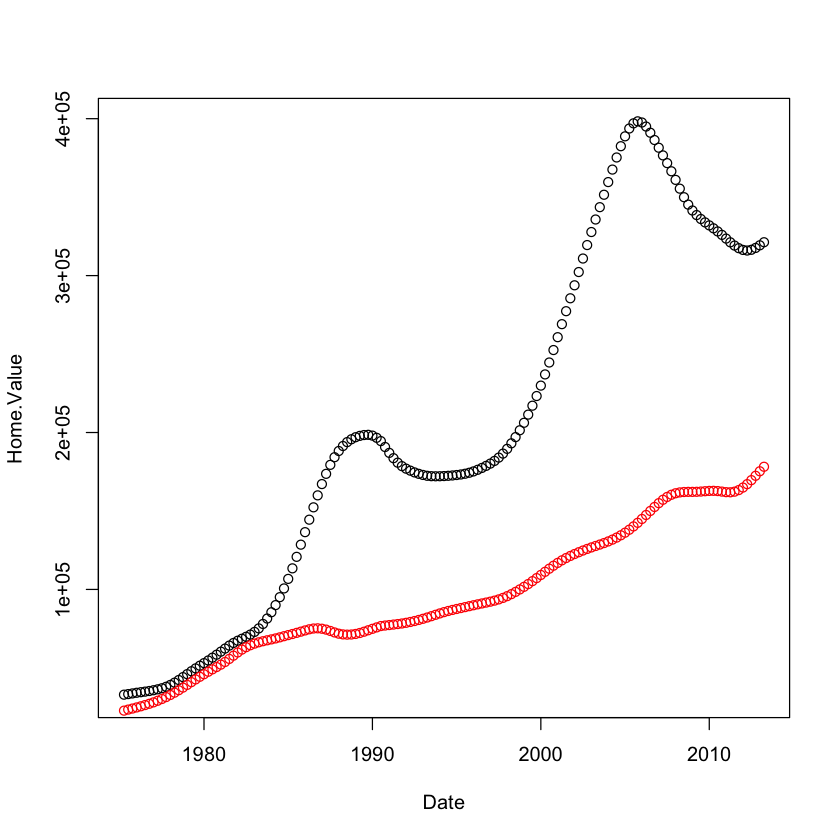

In [6]:
  plot(Home.Value ~ Date,
       data=subset(housing, State == "MA"))
  points(Home.Value ~ Date, col="red",
         data=subset(housing, State == "TX"))
  legend(19750, 400000,
         c("MA", "TX"), title="State",
         col=c("black", "red"),
         pch=c(1, 1))

`ggplot2` colored scatter plot example:

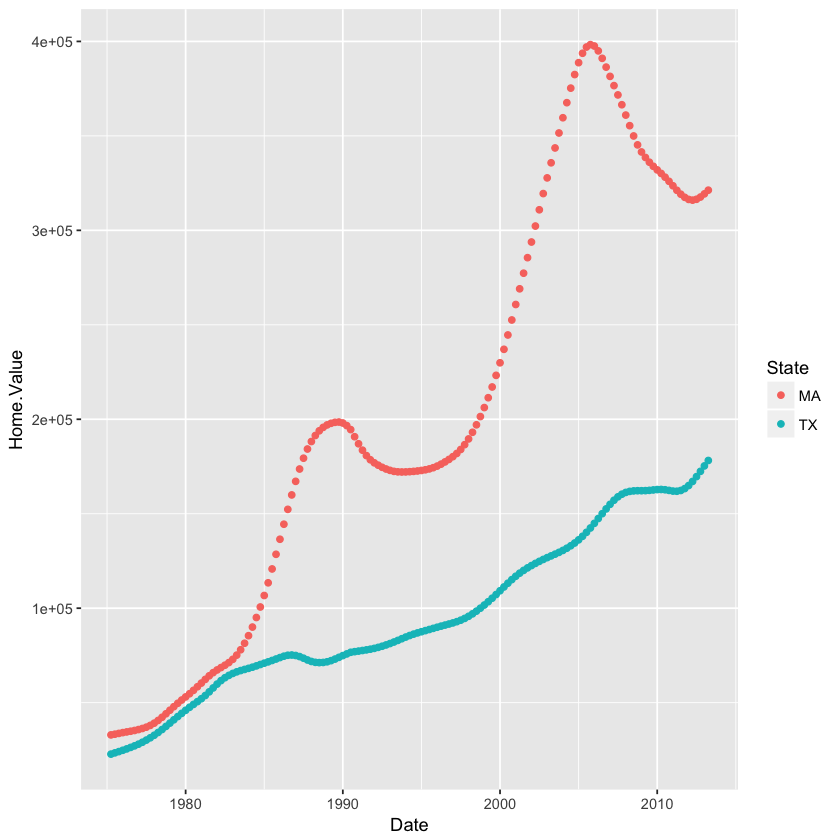

In [7]:
  ggplot(subset(housing, State %in% c("MA", "TX")),
         aes(x=Date,
             y=Home.Value,
             color=State))+
    geom_point()

`ggplot2` wins!

Geometric Objects And Aesthetics
================================

Aesthetic Mapping
-----------------

In ggplot land *aesthetic* means "something you can see". Examples include:

-   position (i.e., on the x and y axes)
-   color ("outside" color)
-   fill ("inside" color)
-   shape (of points)
-   linetype
-   size

Each type of geom accepts only a subset of all aesthetics--refer to the geom help pages to see what mappings each geom accepts. Aesthetic mappings are set with the `aes()` function.

Geometic Objects (`geom`)
-------------------------

Geometric objects are the actual marks we put on a plot. Examples include:

-   points (`geom_point`, for scatter plots, dot plots, etc)
-   lines (`geom_line`, for time series, trend lines, etc)
-   boxplot (`geom_boxplot`, for, well, boxplots!)

A plot must have at least one geom; there is no upper limit. You can add a geom to a plot using the `+` operator

You can get a list of available geometric objects using the code below:

In [8]:
  help.search("geom_", package = "ggplot2")

or simply type `geom_<tab>` in any good R IDE (such as Rstudio or ESS) to see a list of functions starting with `geom_`.

Points (Scatterplot)
--------------------

Now that we know about geometric objects and aesthetic mapping, we can make a ggplot. `geom_point` requires mappings for x and y, all others are optional.

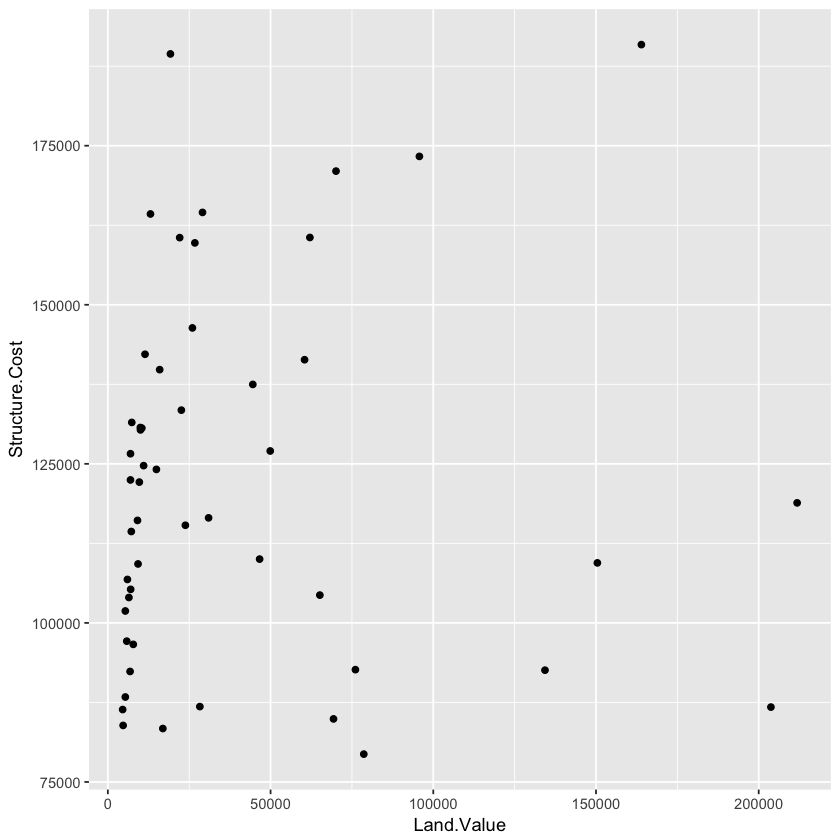

In [15]:
  hp2001Q1 <- subset(housing, Date == 2001.25) 
  ggplot(hp2001Q1,
         aes(y = Structure.Cost, x = Land.Value)) +
    geom_point()

Lines (Prediction Line)
-----------------------

A plot constructed with `ggplot` can have more than one geom. In that case the mappings established in the `ggplot()` call are plot defaults that can be added to or overridden. Our plot could use a regression line:

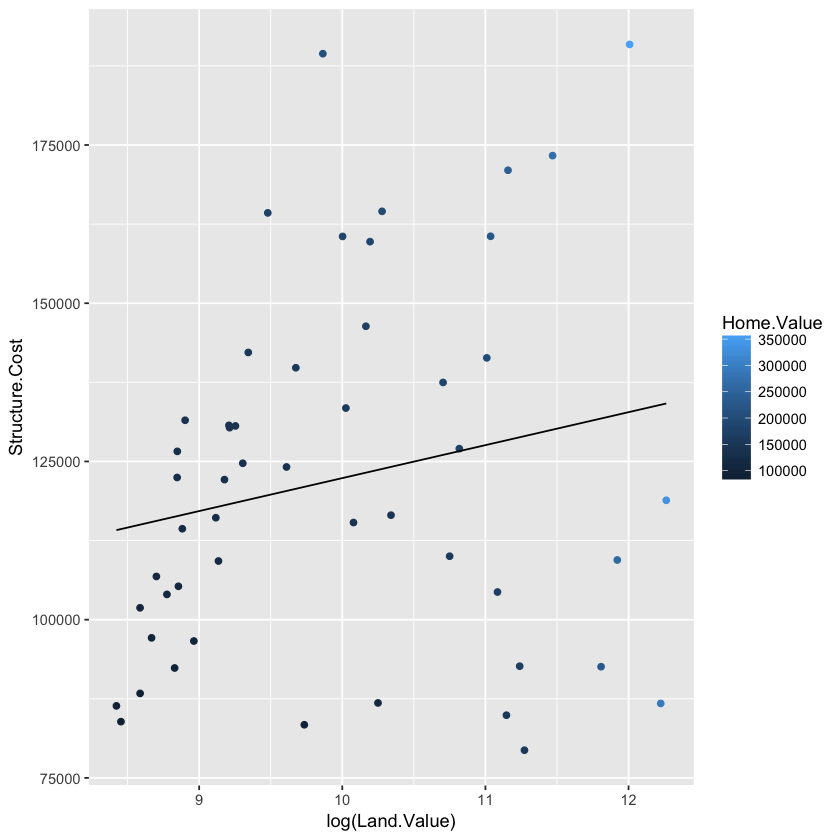

In [18]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

Smoothers
---------

Not all geometric objects are simple shapes--the smooth geom includes a line and a ribbon.

`geom_smooth()` using method = 'loess'


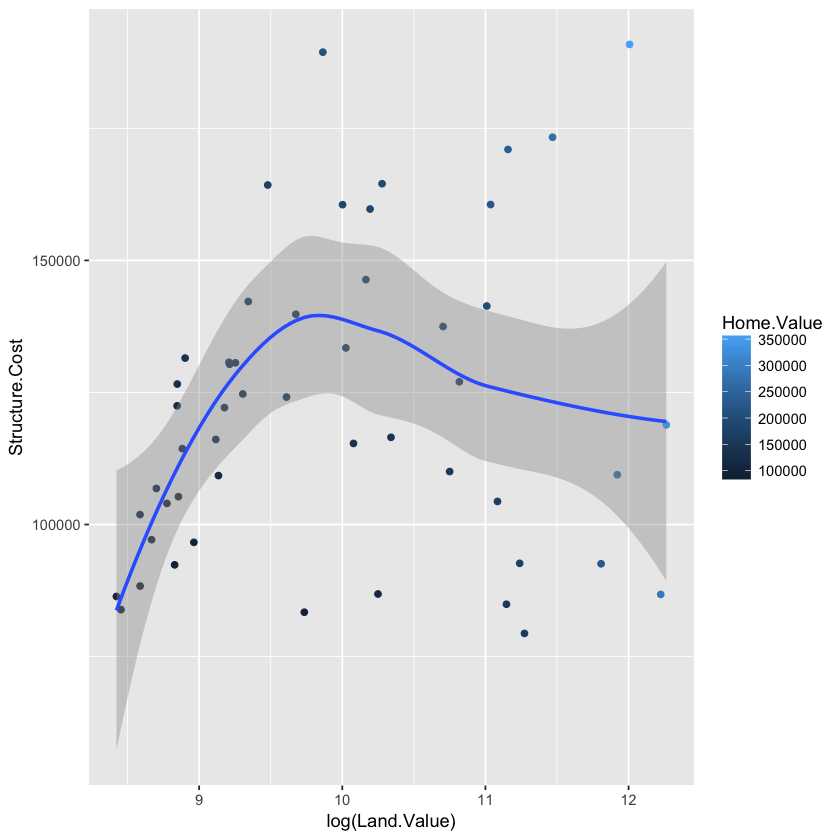

In [19]:
  p1 +
    geom_point(aes(color = Home.Value)) +
    geom_smooth()

Text (Label Points)
-------------------

Each `geom` accepts a particualar set of mappings--for example `geom_text()` accepts a `labels` mapping.

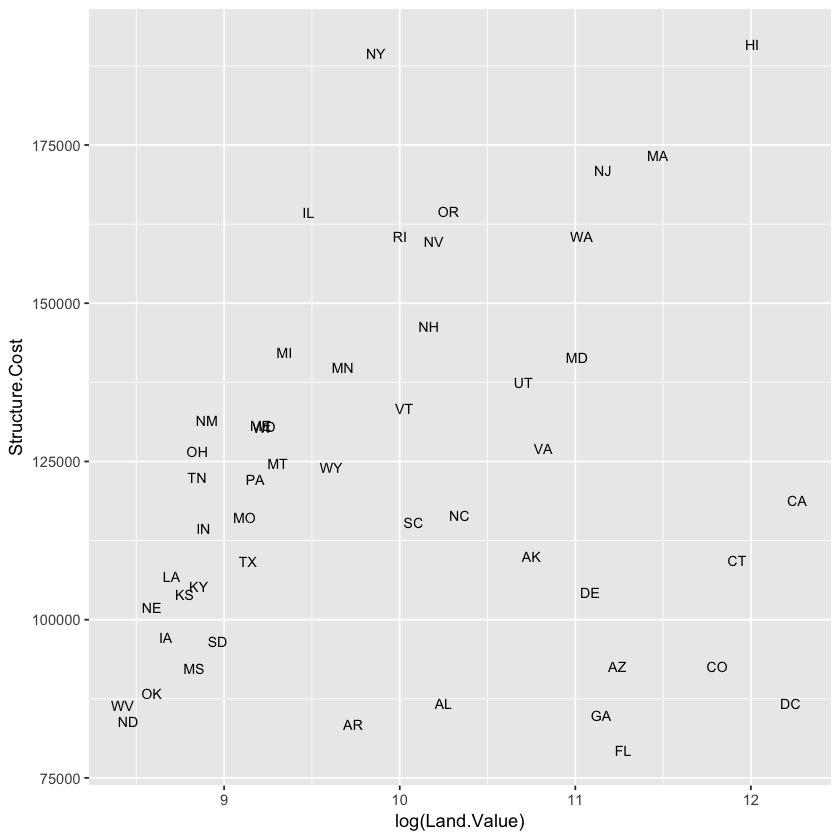

In [20]:
  p1 + 
    geom_text(aes(label=State), size = 3)

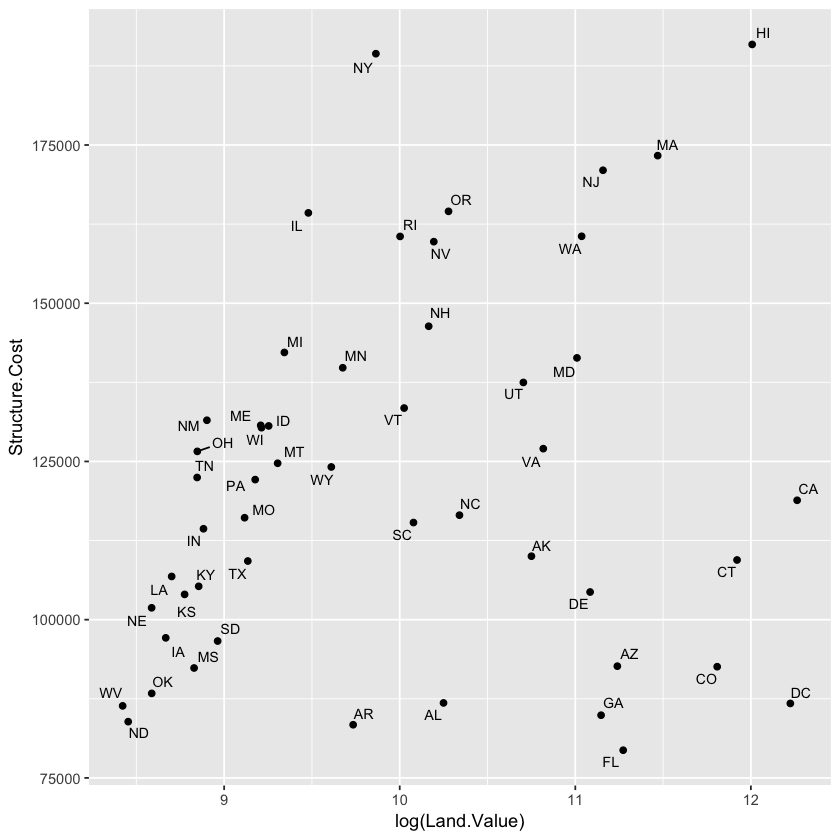

In [21]:
  install.packages("ggrepel") 
  library("ggrepel")
  p1 + 
    geom_point() + 
    geom_text_repel(aes(label=State), size = 3)

Aesthetic Mapping VS Assignment
-------------------------------

Note that variables are mapped to aesthetics with the `aes()` function, while fixed aesthetics are set outside the `aes()` call. This sometimes leads to confusion, as in this example:

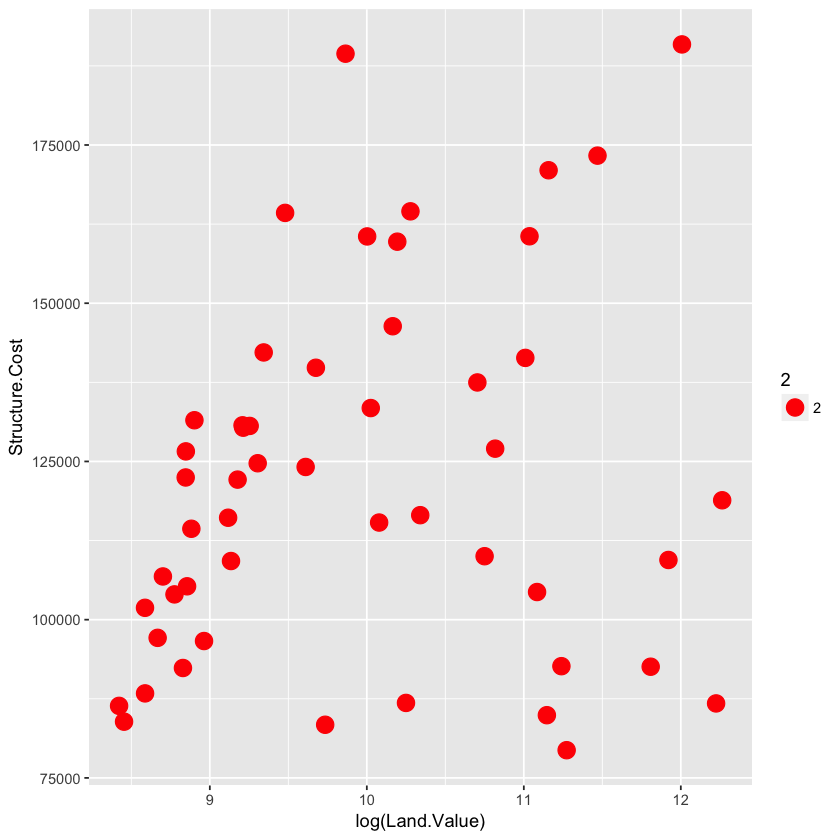

In [22]:
  p1 +
    geom_point(aes(size = 2),# incorrect! 2 is not a variable
               color="red") # this is fine -- all points red

Mapping Variables To Other Aesthetics
-------------------------------------

Other aesthetics are mapped in the same way as x and y in the previous example.

Warning message:
“Removed 1 rows containing missing values (geom_point).”

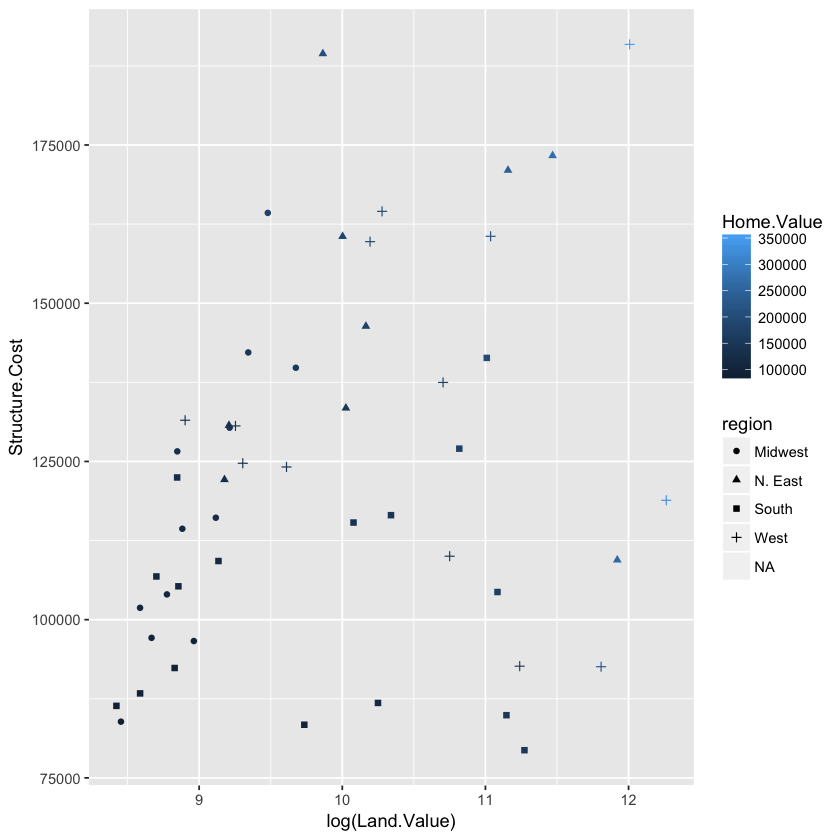

In [23]:
  p1 +
    geom_point(aes(color=Home.Value, shape = region))

Exercise I
----------

The data for the exercises is available in the `dataSets/EconomistData.csv` file. Read it in with

In [ ]:
  dat <- read.csv("dataSets/EconomistData.csv")

Original sources for these data are <http://www.transparency.org/content/download/64476/1031428> <http://hdrstats.undp.org/en/indicators/display_cf_xls_indicator.cfm?indicator_id=103106&lang=en>

These data consist of *Human Development Index* and *Corruption Perception Index* scores for several countries.

1.  Create a scatter plot with CPI on the x axis and HDI on the y axis.
2.  Color the points in the previous plot blue.
3.  Color the points in the previous plot according to *Region*.
4.  Create boxplots of CPI by Region
5.  Overlay points on top of the box plots

Exercise I prototype<span class="tag" data-tag-name="prototype"></span>
-----------------------------------------------------------------------

1.  \[@1\] Create a scatter plot with CPI on the x axis and HDI on the y axis.

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI)) +
    geom_point()

1.  \[@2\] Color the points in the previous plot blue.

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI)) +
    geom_point(color = "blue")

1.  \[@3\] Color the points in the previous plot according to *Region*.

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI)) +
    geom_point(aes(color = Region))

1.  \[@4\] Create boxplots of CPI by Region

In [ ]:
  ggplot(dat, aes(x = Region, y = CPI)) +
    geom_boxplot()

1.  \[@5\] Overlay points on top of the box plots

In [ ]:
  ggplot(dat, aes(x = Region, y = CPI)) +
    geom_boxplot() +
    geom_point() 

Statistical Transformations
===========================

Statistical Transformations
---------------------------

Some plot types (such as scatterplots) do not require transformations--each point is plotted at x and y coordinates equal to the original value. Other plots, such as boxplots, histograms, prediction lines etc. require statistical transformations:

-   for a boxplot the y values must be transformed to the median and 1.5(IQR)
-   for a smoother smother the y values must be transformed into predicted values

Each `geom` has a default statistic, but these can be changed. For example, the default statistic for `geom_bar` is `stat_count`:

In [24]:
  args(geom_histogram)
  args(stat_bin)

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

Setting Statistical Transformation Arguments
--------------------------------------------

Arguments to `stat_` functions can be passed through `geom_` functions. This can be slightly annoying because in order to change it you have to first determine which stat the geom uses, then determine the arguments to that stat.

For example, here is the default histogram of Home.Value:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


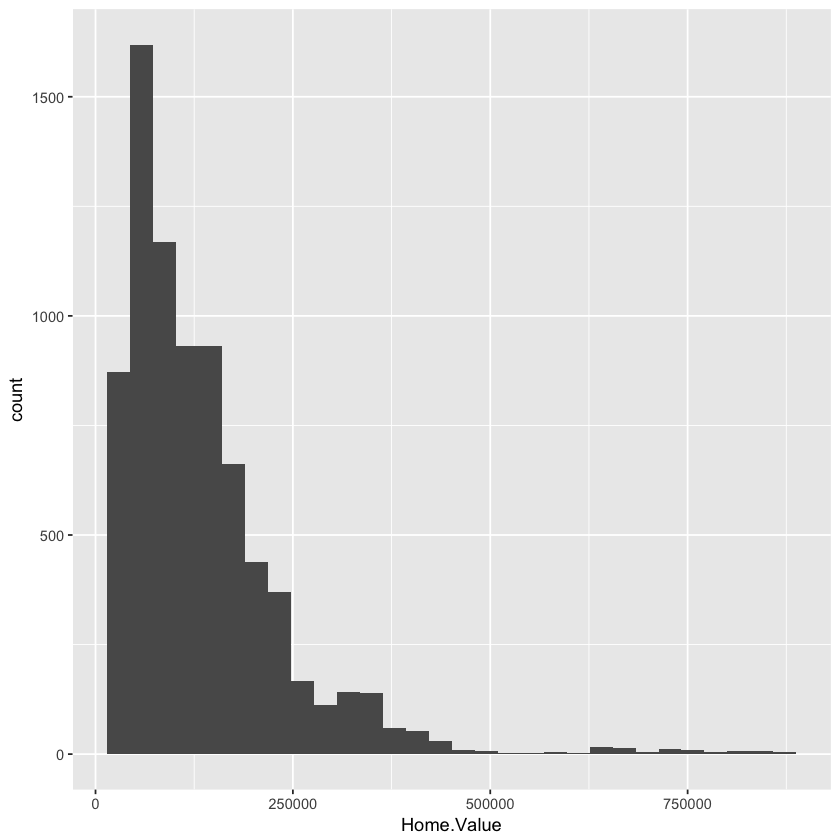

In [25]:
  p2 <- ggplot(housing, aes(x = Home.Value))
  p2 + geom_histogram()

The binwidth looks reasonable by default, but we can change it by passing the `binwidth` argument to the `stat_bin` function:

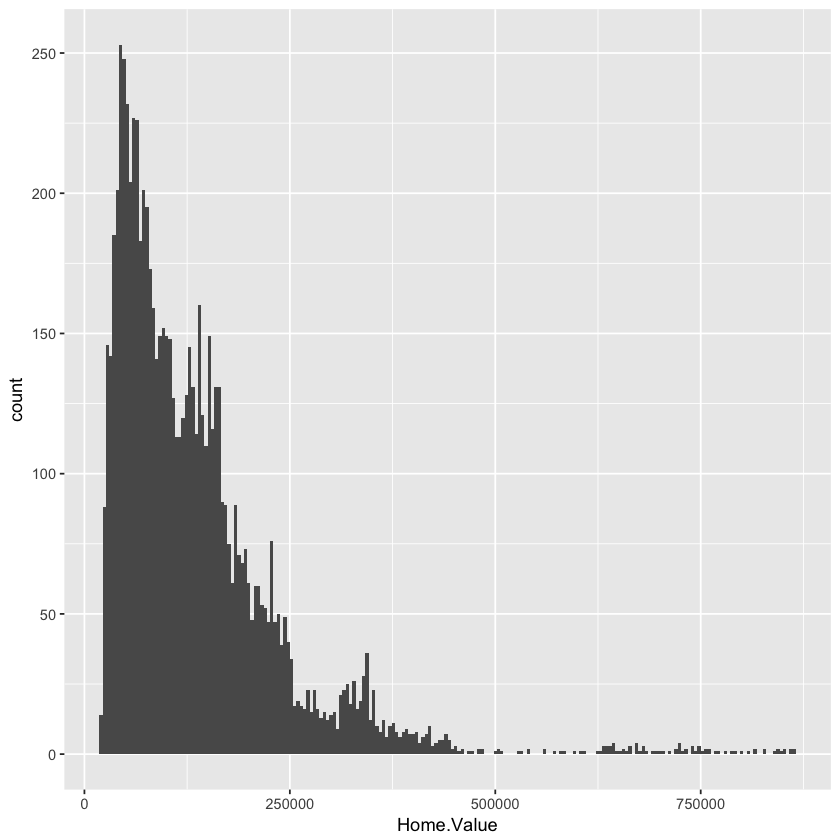

In [26]:
  p2 + geom_histogram(stat = "bin", binwidth=4000)

Changing The Statistical Transformation
---------------------------------------

Sometimes the default statistical transformation is not what you need. This is often the case with pre-summarized data:

In [27]:
  housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
  rbind(head(housing.sum), tail(housing.sum))

State Home.Value
1  AK    147385.14 
2  AL     92545.22 
3  AR     82076.84 
4  AZ    140755.59 
5  CA    282808.08 
6  CO    158175.99 
46 VA    155391.44 
47 VT    132394.60 
48 WA    178522.58 
49 WI    108359.45 
50 WV     77161.71 
51 WY    122897.25

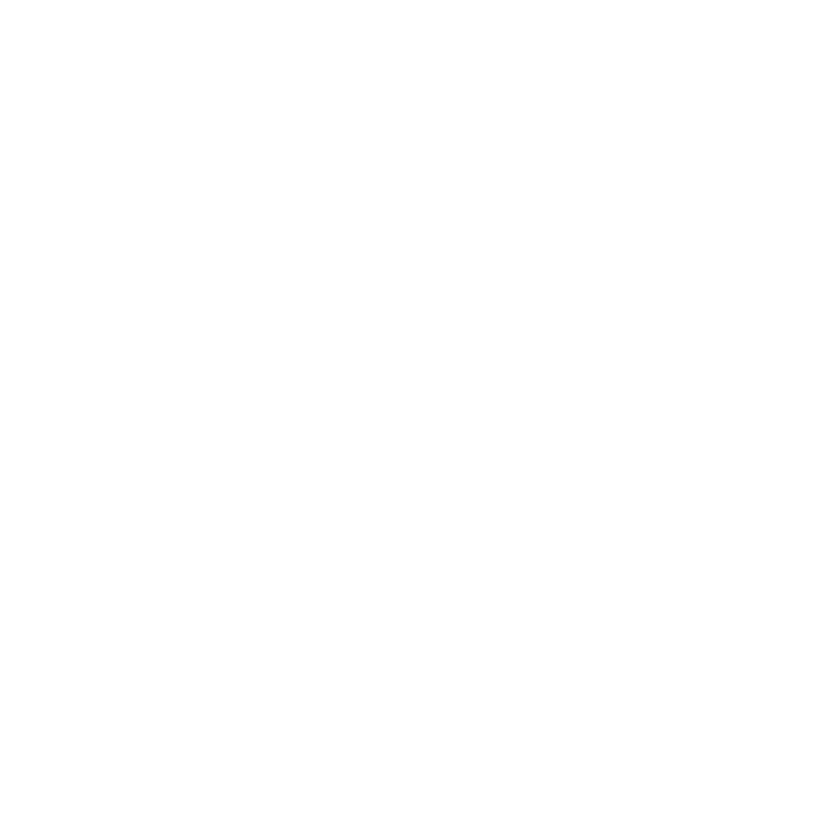

In [28]:
  ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
    geom_bar()

``` example
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar()
Error: stat_count() must not be used with a y aesthetic.
```


What is the problem with the previous plot? Basically we take binned and summarized data and ask ggplot to bin and summarize it again (remember, `geom_bar` defaults to `stat ` stat<sub>count</sub>=); obviously this will not work. We can fix it by telling `geom_bar` to use a different statistical transformation function:

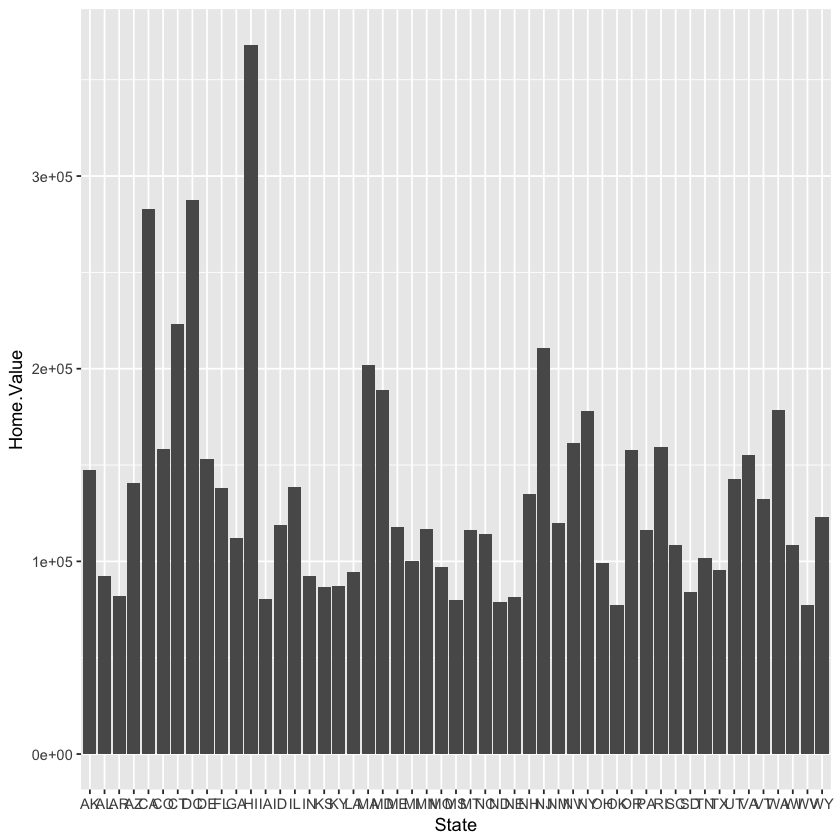

In [29]:
  ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
    geom_bar(stat="identity")

Exercise II
-----------

1.  Re-create a scatter plot with CPI on the x axis and HDI on the y axis (as you did in the previous exercise).
2.  Overlay a smoothing line on top of the scatter plot using the *lm* method. Hint: see `?stat_smooth`.
3.  Overlay a smoothing line on top of the scatter plot using the default method.
4.  BONUS (optional): Overlay a smoothing line on top of the scatter plot using the default *loess* method, but make it less smooth. Hint: see `?loess`.

Exercise II prototype<span class="tag" data-tag-name="prototype"></span>
------------------------------------------------------------------------

1.  \[@1\] Re-create a scatter plot with CPI on the x axis and HDI on the y axis (as you did in the previous exercise).

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI)) +
    geom_point()

1.  \[@2\] Overlay a smoothing line on top of the scatter plot using the *lm* method. Hint: see `?stat_smooth`.

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI)) +
    geom_point() +
    geom_smooth(method = "lm")

1.  \[@3\] Overlay a smoothing line on top of the scatter plot using the default method.

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI)) +
    geom_point() +
    geom_smooth()

1.  \[@4\] BONUS (optional): Overlay a smoothing line on top of the scatter plot using the default *loess* method, but make it less smooth. Hint: see `?loess`.

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI)) +
    geom_point() +
    geom_smooth(span = .4)

Scales
======

Scales: Controlling Aesthetic Mapping
-------------------------------------

Aesthetic mapping (i.e., with `aes()`) only says that a variable should be mapped to an aesthetic. It doesn't say *how* that should happy. For example, when mapping a variable to *shape* with `aes(shape ` x)= you don't say *what* shapes should be used. Similarly, `aes(color ` z)= doesn't say *what* colors should be used. Describing what colors/shapes/sizes etc. to use is done by modifying the corresponding *scale*. In `ggplot2` scales include

-   position
-   color and fill
-   size
-   shape
-   line type

Scales are modified with a series of functions using a `scale_<aesthetic>_<type>` naming scheme. Try typing `scale_<tab>` to see a list of scale modification functions.

Common Scale Arguments
----------------------

The following arguments are common to most scales in ggplot2:

name  
the first argument gives the axis or legend title

limits  
the minimum and maximum of the scale

breaks  
the points along the scale where labels should appear

labels  
the labels that appear at each break

Specific scale functions may have additional arguments; for example, the `scale_color_continuous` function has arguments `low` and `high` for setting the colors at the low and high end of the scale.

Scale Modification Examples
---------------------------

Start by constructing a dotplot showing the distribution of home values by Date and State.

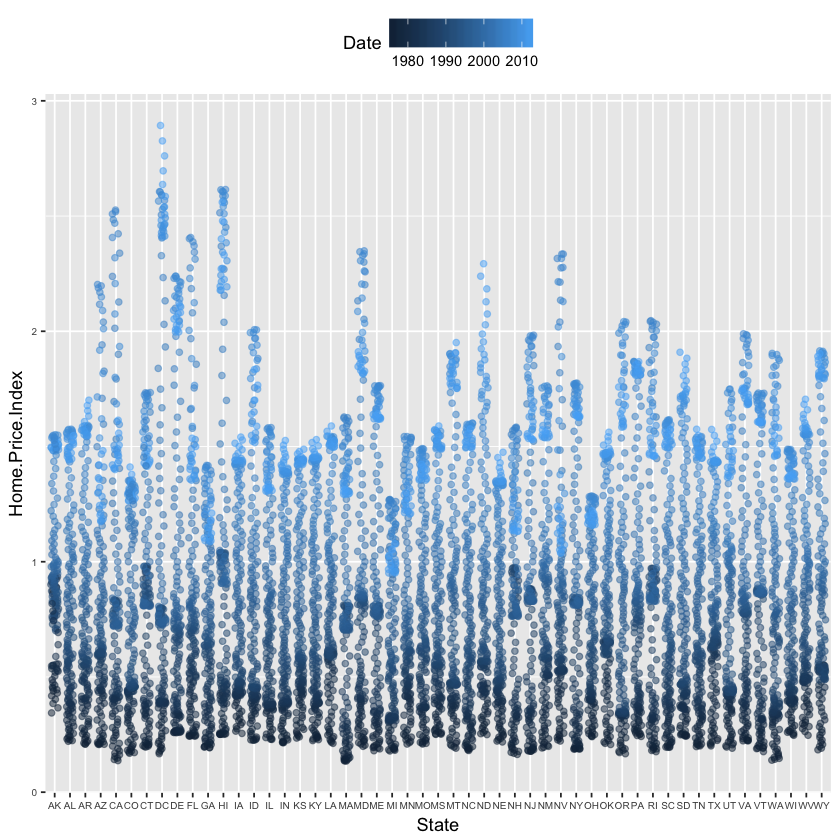

In [30]:
  p3 <- ggplot(housing,
               aes(x = State,
                   y = Home.Price.Index)) + 
          theme(legend.position="top",
                axis.text=element_text(size = 6))
  (p4 <- p3 + geom_point(aes(color = Date),
                         alpha = 0.5,
                         size = 1.5,
                         position = position_jitter(width = 0.25, height = 0)))

Now modify the breaks and labels for the x axis and color scales

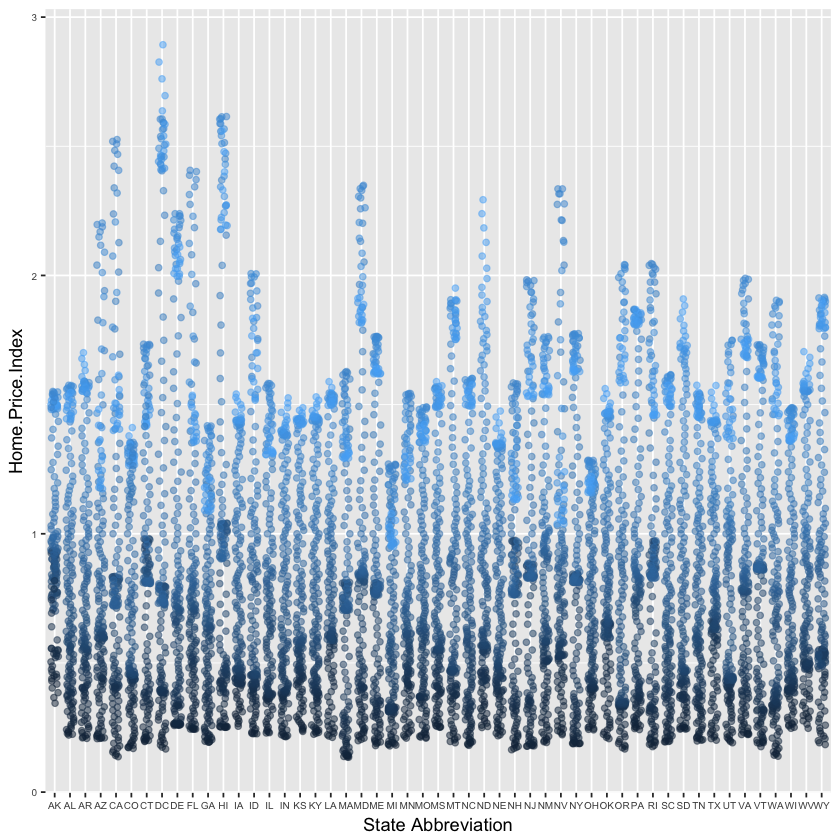

In [31]:
  p4 + scale_x_discrete(name="State Abbreviation") +
    scale_color_continuous(name="",
                           breaks = c(19751, 19941, 20131),
                           labels = c(1971, 1994, 2013))

Next change the low and high values to blue and red:

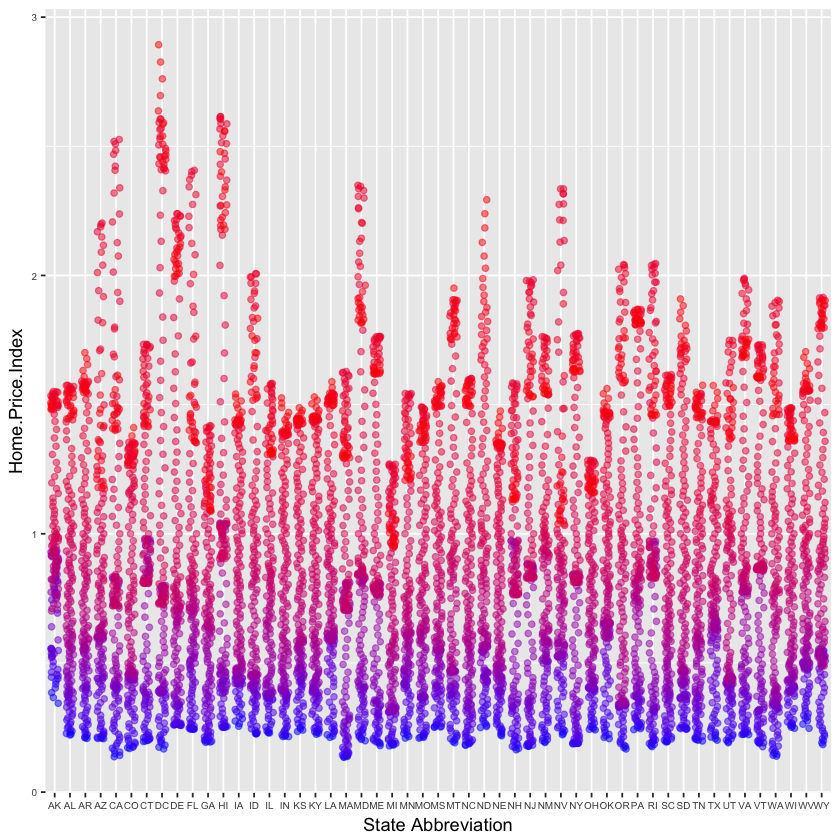

In [32]:
  p4 +
    scale_x_discrete(name="State Abbreviation") +
    scale_color_continuous(name="",
                           breaks = c(19751, 19941, 20131),
                           labels = c(1971, 1994, 2013),
                           low = "blue", high = "red")

In [40]:
install.packages("scales")

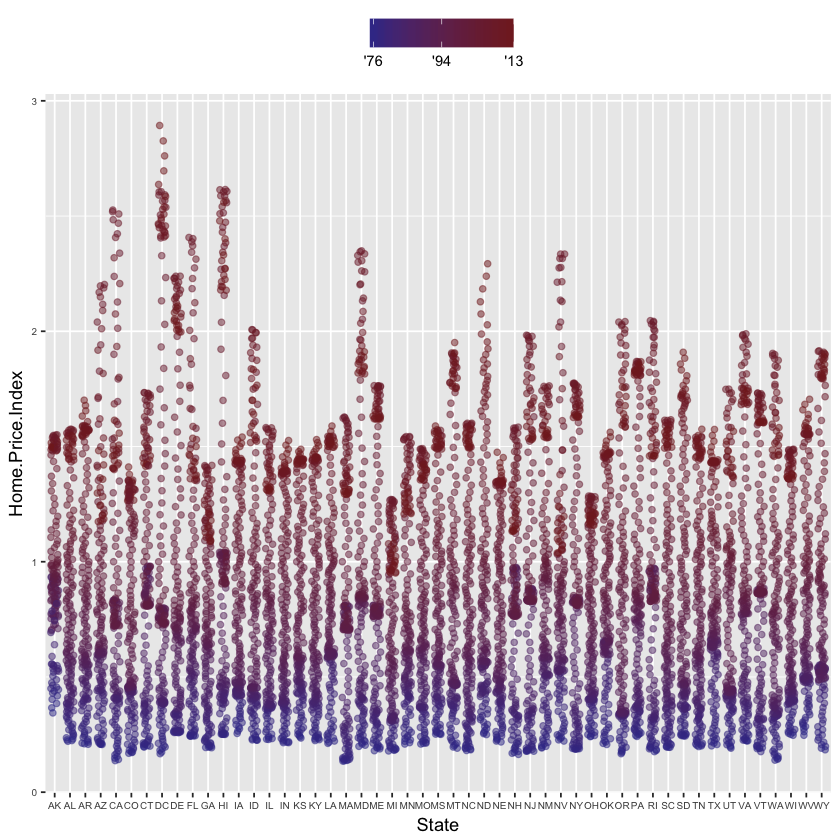

In [41]:
library(scales)
p4 +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = muted("blue"), high = muted("red"))

Using different color scales
----------------------------

ggplot2 has a wide variety of color scales; here is an example using `scale_color_gradient2` to interpolate between three different colors.

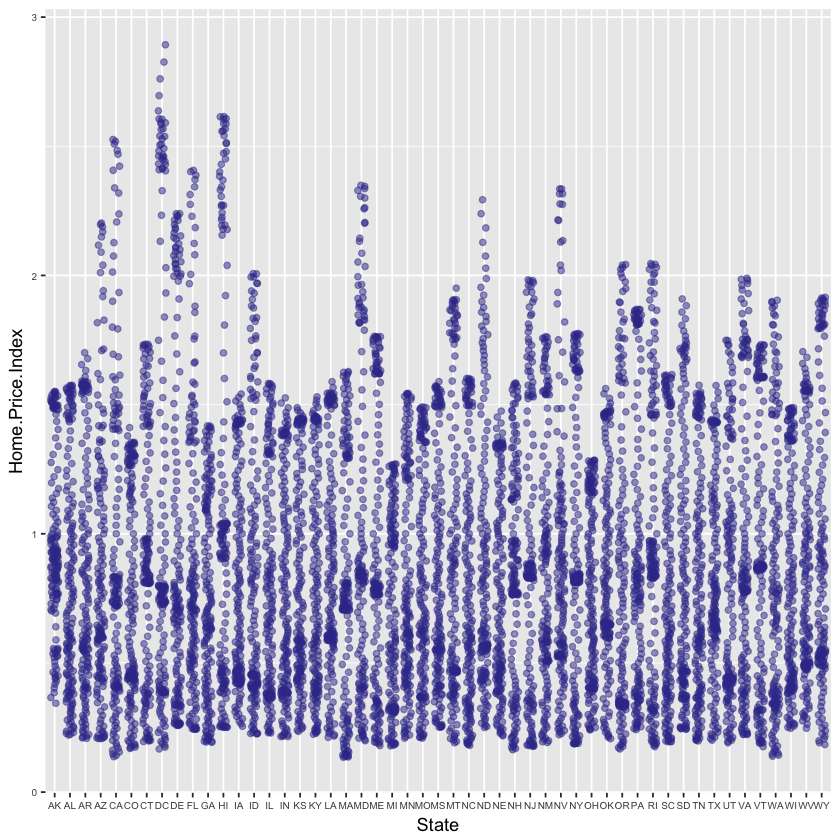

In [42]:
  p4 +
    scale_color_gradient2(name="",
                          breaks = c(19751, 19941, 20131),
                          labels = c(1971, 1994, 2013),
                          low = muted("blue"),
                          high = muted("red"),
                          mid = "gray60",
                          midpoint = 19941)

Available Scales
----------------

-   Partial combination matrix of available scales

| **Scale**                  | **Types**  | **Examples**                     |
|----------------------------|------------|----------------------------------|
| scale<sub>color</sub>\_    | identity   | scale<sub>fillcontinuous</sub>   |
| scale<sub>fill</sub>\_     | manual     | scale<sub>colordiscrete</sub>    |
| scale<sub>size</sub>\_     | continuous | scale<sub>sizemanual</sub>       |
|                            | discrete   | scale<sub>sizediscrete</sub>     |
| scale<sub>shape</sub>\_    | discrete   | scale<sub>shapediscrete</sub>    |
| scale<sub>linetype</sub>\_ | identity   | scale<sub>shapemanual</sub>      |
|                            | manual     | scale<sub>linetypediscrete</sub> |
| scale<sub>x</sub>\_        | continuous | scale<sub>xcontinuous</sub>      |
| scale<sub>y</sub>\_        | discrete   | scale<sub>ydiscrete</sub>        |
|                            | reverse    | scale<sub>xlog</sub>             |
|                            | log        | scale<sub>yreverse</sub>         |
|                            | date       | scale<sub>xdate</sub>            |
|                            | datetime   | scale<sub>ydatetime</sub>        |

Note that in RStudio you can type `scale_` followed by TAB to get the whole list of available scales.

Exercise III
------------

1.  Create a scatter plot with CPI on the x axis and HDI on the y axis. Color the points to indicate region.
2.  Modify the x, y, and color scales so that they have more easily-understood names (e.g., spell out "Human development Index" instead of "HDI").
3.  Modify the color scale to use specific values of your choosing. Hint: see `?scale_color_manual`.

Exercise III prototype<span class="tag" data-tag-name="prototype"></span>
-------------------------------------------------------------------------

1.  \[@1\] Create a scatter plot with CPI on the x axis and HDI on the y axis. Color the points to indicate region.

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI, color = "Region")) +
    geom_point()

1.  \[@2\] Modify the x, y, and color scales so that they have more easily-understood names (e.g., spell out "Human development Index" instead of "HDI").

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI, color = "Region")) +
  geom_point() +
  scale_x_continuous(name = "Corruption Perception Index") +
  scale_y_continuous(name = "Human Development Index") +
  scale_color_discrete(name = "Region of the world")

1.  \[@3\] Modify the color scale to use specific values of your choosing. Hint: see `?scale_color_manual`.

In [ ]:
  ggplot(dat, aes(x = CPI, y = HDI, color = "Region")) +
  geom_point() +
  scale_x_continuous(name = "Corruption Perception Index") +
  scale_y_continuous(name = "Human Development Index") +
    scale_color_manual(name = "Region of the world",
                       values = c("#24576D",
                                  "#099DD7",
                                  "#28AADC",
                                  "#248E84",
                                  "#F2583F",
                                  "#96503F"))

Faceting
========

Faceting
--------

-   Faceting is `ggplot2` parlance for **small multiples**
-   The idea is to create separate graphs for subsets of data
-   `ggplot2` offers two functions for creating small multiples:
    1.  `facet_wrap()`: define subsets as the levels of a single grouping variable
    2.  `facet_grid()`: define subsets as the crossing of two grouping variables
-   Facilitates comparison among plots, not just of geoms within a plot

What is the trend in housing prices in each state?
--------------------------------------------------

-   Start by using a technique we already know--map State to color:

In [ ]:
  p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
  p5 + geom_line(aes(color = State))  

There are two problems here--there are too many states to distinguish each one by color, and the lines obscure one another.

Faceting to the rescue
----------------------

We can remedy the deficiencies of the previous plot by faceting by state rather than mapping state to color.

In [ ]:
  (p5 <- p5 + geom_line() +
     facet_wrap(~State, ncol = 10))

There is also a `facet_grid()` function for faceting in two dimensions.

Themes
======

Themes
------

The `ggplot2` theme system handles non-data plot elements such as

-   Axis labels
-   Plot background
-   Facet label backround
-   Legend appearance

Built-in themes include:

-   `theme_gray()` (default)
-   `theme_bw()`
-   `theme_classc()`

In [ ]:
  p5 + theme_linedraw()

In [ ]:
  p5 + theme_light()

Overriding theme defaults
-------------------------

Specific theme elements can be overridden using `theme()`. For example:

In [ ]:
  p5 + theme_minimal() +
    theme(text = element_text(color = "turquoise"))

All theme options are documented in `?theme`.

Creating and saving new themes
------------------------------

You can create new themes, as in the following example:

In [ ]:
  theme_new <- theme_bw() +
    theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
          text=element_text(size = 12, family = "Serif", color = "ivory"),
          axis.text.y = element_text(colour = "purple"),
          axis.text.x = element_text(colour = "red"),
          panel.background = element_rect(fill = "pink"),
          strip.background = element_rect(fill = muted("orange")))

  p5 + theme_new

The \#1 FAQ
===========

Map Aesthetic To Different Columns
----------------------------------

The most frequently asked question goes something like this: *I have two variables in my data.frame, and I'd like to plot them as separate points, with different color depending on which variable it is. How do I do that?*

### Wrong

In [ ]:
  housing.byyear <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)
  ggplot(housing.byyear,
         aes(x=Date)) +
    geom_line(aes(y=Home.Value), color="red") +
    geom_line(aes(y=Land.Value), color="blue")


  #

### Right

In [ ]:
  library(tidyr)
  home.land.byyear <- gather(housing.byyear,
                             value = "value",
                             key = "type",
                             Home.Value, Land.Value)
  ggplot(home.land.byyear,
         aes(x=Date,
             y=value,
             color=type)) +
    geom_line()

Putting It All Together
=======================

Challenge: Recreate This `Economist` Graph
------------------------------------------

[file:images/Economist1.pdf](images/Economist1.pdf)

Graph source: <http://www.economist.com/node/21541178>

Building off of the graphics you created in the previous exercises, put the finishing touches to make it as close as possible to the original economist graph.

![](images/Economist1.png)

Challenge Solution<span class="tag" data-tag-name="prototype"></span>
=====================================================================

Lets start by creating the basic scatter plot, then we can make a list of things that need to be added or changed. The basic plot loogs like this:

In [ ]:
  dat <- read.csv("dataSets/EconomistData.csv")

  pc1 <- ggplot(dat, aes(x = CPI, y = HDI, color = Region))
  pc1 + geom_point()

To complete this graph we need to:

-   \[ \] add a trend line
-   \[ \] change the point shape to open circle
-   \[ \] change the order and labels of Region
-   \[ \] label select points
-   \[ \] fix up the tick marks and labels
-   \[ \] move color legend to the top
-   \[ \] title, label axes, remove legend title
-   \[ \] theme the graph with no vertical guides
-   \[ \] add model R<sup>2</sup> (hard)
-   \[ \] add sources note (hard)
-   \[ \] final touches to make it perfect (use image editor for this)

Adding the trend line
---------------------

Adding the trend line is not too difficult, though we need to guess at the model being displyed on the graph. A little bit of trial and error leds to

In [ ]:
  (pc2 <- pc1 +
     geom_smooth(aes(group = 1),
                 method = "lm",
                 formula = y ~ log(x),
                 se = FALSE,
                 color = "red")) +
     geom_point()

Notice that we put the `geom_line` layer first so that it will be plotted underneath the points, as was done on the original graph.

Use open points
---------------

This one is a little tricky. We know that we can change the shape with the `shape` argument, what what value do we set shape to? The example shown in `?shape` can help us:

In [ ]:
  ## A look at all 25 symbols
  df2 <- data.frame(x = 1:5 , y = 1:25, z = 1:25)
  s <- ggplot(df2, aes(x = x, y = y))
  s + geom_point(aes(shape = z), size = 4) + scale_shape_identity()
  ## While all symbols have a foreground colour, symbols 19-25 also take a
  ## background colour (fill)
  s + geom_point(aes(shape = z), size = 4, colour = "Red") +
    scale_shape_identity()
  s + geom_point(aes(shape = z), size = 4, colour = "Red", fill = "Black") +
    scale_shape_identity()

This shows us that *shape 1* is an open circle, so

In [ ]:
  pc2 +
    geom_point(shape = 1, size = 4)

That is better, but unfortunately the size of the line around the points is much narrower than on the original. This is a frustrating aspect of ggplot2, and we will have to hack around it. One way to do that is to multiple point layers of slightly different sizes.

In [ ]:
  (pc3 <- pc2 +
     geom_point(size = 4.5, shape = 1) +
     geom_point(size = 4, shape = 1) +
     geom_point(size = 3.5, shape = 1))

Labelling points
----------------

This one is tricky in a couple of ways. First, there is no attribute in the data that separates points that should be labelled from points that should not be. So the first step is to identify those points.

In [ ]:
  pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                     "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                     "India", "Italy", "China", "South Africa", "Spane",
                     "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                     "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                     "New Zealand", "Singapore")

Now we can label these points using `geom_text`, like this:

\#+END<sub>SRC</sub>

In [ ]:
  (pc4 <- pc3 +
    geom_text(aes(label = Country),
              color = "gray20",
              data = subset(dat, Country %in% pointsToLabel)))

This more or less gets the information across, but the labels overlap in a most unpleasing fashion. We can use the `ggrepel` package to make things better, but if you want perfection you will probably have to do some hand-adjustment.

In [ ]:
  library("ggrepel")
  pc3 +
    geom_text_repel(aes(label = Country),
              color = "gray20",
              data = subset(dat, Country %in% pointsToLabel),
              force = 10)

Change the region labels and order
----------------------------------

Thinkgs are starting to come together. There are just a couple more things we need to add, and then all that will be left are themeing changes.

Comparing our graph to the original we notice that the labels and order of the Regions in the color legend differ. To correct this we need to change both the labels and order of the Region variable. We can do this with the `factor` function.

In [ ]:
  dat$Region <- factor(dat$Region,
                       levels = c("EU W. Europe",
                                  "Americas",
                                  "Asia Pacific",
                                  "East EU Cemt Asia",
                                  "MENA",
                                  "SSA"),
                       labels = c("OECD",
                                  "Americas",
                                  "Asia &\nOceania",
                                  "Central &\nEastern Europe",
                                  "Middle East &\nnorth Africa",
                                  "Sub-Saharan\nAfrica"))

Now when we construct the plot using these data the order should appear as it does in the original.

In [ ]:
  pc4$data <- dat
  pc4

Add title and format axes
-------------------------

The next step is to add the title and format the axes. We do that using the `scales` system in ggplot2.

In [ ]:
  library(grid)
  (pc5 <- pc4 +
    scale_x_continuous(name = "Corruption Perceptions Index, 2011 (10=least corrupt)",
                       limits = c(.9, 10.5),
                       breaks = 1:10) +
    scale_y_continuous(name = "Human Development Index, 2011 (1=Best)",
                       limits = c(0.2, 1.0),
                       breaks = seq(0.2, 1.0, by = 0.1)) +
    scale_color_manual(name = "",
                       values = c("#24576D",
                                  "#099DD7",
                                  "#28AADC",
                                  "#248E84",
                                  "#F2583F",
                                  "#96503F")) +
    ggtitle("Corruption and Human development"))

Theme tweaks
------------

Our graph is almost there. To finish up, we need to adjust some of the theme elements, and label the axes and legends. This part usually involves some trial and error as you figure out where things need to be positioned. To see what these various theme settings do you can change them and observe the results.

In [ ]:
  library(grid) # for the 'unit' function
  (pc6 <- pc5 +
    theme_minimal() + # start with a minimal theme and add what we need
    theme(text = element_text(color = "gray20"),
          legend.position = c("top"), # position the legend in the upper left 
          legend.direction = "horizontal",
          legend.justification = 0.1, # anchor point for legend.position.
          legend.text = element_text(size = 11, color = "gray10"),
          axis.text = element_text(face = "italic"),
          axis.title.x = element_text(vjust = -1), # move title away from axis
          axis.title.y = element_text(vjust = 2), # move away for axis
          axis.ticks.y = element_blank(), # element_blank() is how we remove elements
          axis.line = element_line(color = "gray40", size = 0.5),
          axis.line.y = element_blank(),
          panel.grid.major = element_line(color = "gray50", size = 0.5),
          panel.grid.major.x = element_blank()
          ))

Add model R<sup>2</sup> and source note
---------------------------------------

The last bit of information that we want to have on the graph is the variance explained by the model represented by the trend line. Lets fit that model and pull out the R<sup>2</sup> first, then think about how to get it onto the graph.

In [ ]:
  (mR2 <- summary(lm(HDI ~ log(CPI), data = dat))$r.squared)

OK, now that we've calculated the values, let's think about how to get them on the graph. ggplot2 has an `annotate` function, but this is not convenient for adding elements outside the plot area. The `grid` package has nice functions for doing this, so we'll use those.

And here it is, our final version!

In [ ]:
  library(grid)
  png(file = "images/econScatter10.png", width = 800, height = 600)
  pc6 
  grid.text("Sources: Transparency International; UN Human Development Report",
           x = .02, y = .03,
           just = "left",
           draw = TRUE)
  grid.segments(x0 = 0.81, x1 = 0.825,
                y0 = 0.90, y1 = 0.90,
                gp = gpar(col = "red"),
                draw = TRUE)
  grid.text(paste0("R² = ",
                   as.integer(mR2*100),
                   "%"),
            x = 0.835, y = 0.90,
            gp = gpar(col = "gray20"),
            draw = TRUE,
            just = "left")

  dev.off()

![](images/econScatter10.png)

Comparing it to the original suggests that we've got most of the important elements, though of course the two graphs are not identical. ![](images/Economist1.png)

Wrap-up
=======

Help Us Make This Workshop Even Better!
---------------------------------------

-   Please take a moment to fill out a very short feedback form
-   These workshops exist for you -- tell us what you need!
-   <http://tinyurl.com/R-graphics-feedback>

Additional resources
--------------------

-   ggplot2 resources
    -   Mailing list: <http://groups.google.com/group/ggplot2>
    -   Wiki: <https://github.com/hadley/ggplot2/wiki>
    -   Website: <http://had.co.nz/ggplot2/>
    -   StackOverflow: <http://stackoverflow.com/questions/tagged/ggplot>
-   IQSS resources
    -   Research technology consulting: <http://projects.iq.harvard.edu/rtc>
    -   Workshops: <http://projects.iq.harvard.edu/rtc/filter_by/workshops>